## Comparing counties across the nation
How similar is drug prescription across counties?  How can we compare counties to each other in terms of drug prescription rates?  Is there some interesting underlying factor?

### Comparing rates of drug prescription
One way is directly comparing the rate of drug prescription, as in the web server.  

On the server, you select the variables year, age, year_Rx, years_observed (as in [Sep 20 writeup](http://nbviewer.jupyter.org/github/RDMelamed/writeups/blob/master/Sep20_evaluation.ipynb)) as well as your drug of interest

As discussed in the Sep 20, all four of these variables generally influence prescription, even when the others are accounted for.  Then, stratifying by all four of these (which I collectively label $b = [year,age,year\_Rx,years\_observed]$), plus the county, we can calculate
$$p_{d,county,b} = {{number\ first\ taking\ d\ in\ b} \over {number\ in\ b\ who\ have\ not\ previously\ taken\ d  }} = {count_{d, county, b} \over denominator_{d,county,b} } $$ 

So this probability is a simple fraction per patient after stratifying into bin $b$, and removing people who previously took the drug.  This gets pretty sparse, even in decent sized counties. To deal with this for the visualization, I addes pseudocounts to this fraction, determined by maximum likelihood.  One pair of pseudocounts is determined for each drug (reflecting general rate of drug).

$$ \tilde{p}_{d,county,b} = {count_{d, county, b} + \alpha_d \over denominator_{d,county,b} + \beta_d } $$ 

This rate is what is plotted on the map.  But, this is a different rate for each bin and each drug, and I'm not sure if this is a satisfactory way of dealing with sparseness

### Comparing $O_d$/$E_d$ across the nation

A second way of comparing counties, is by examining their departure from the nation-wide pattern of drug-taking.

#### Nation-wide drug-taking
The counties are pretty sparse for the 15000 bins *b*, so it was hard to tell if these four variables are adequate. To test this, I ignored county: I calculate the probabilities nationwide, simply adding up the counts across counties:
$$p_{d,b} = { {\sum_{county} count_{d, county, b} } \over {\sum_{county} denominator_{d,county,b} } }$$ 

Obviously this will skew the result towards populous counties. 
As also described in [Sep 20](http://nbviewer.jupyter.org/github/RDMelamed/writeups/blob/master/Sep20_evaluation.ipynb), we can evaluate how accurately we are predicting per county using randomly selected time periods for each person in the data.  

#### Comparing counties across the nation
In the simplest test, I randomly select *one bin*  (one combination of age and year) for each person.  For example, for person A below, after the two-year "comparison" window, the person has these 4 bins observed: 
- (2005,45,1,4)  containing drug {c}
- (2006,45,1,4)  containing drug {f}
- (2006,50,2,4)  containing drug {e, d}
- (2008,50,1,4)  containing drug {g}

Of these 4 bins, we randomly select select one (indicated by the red box)

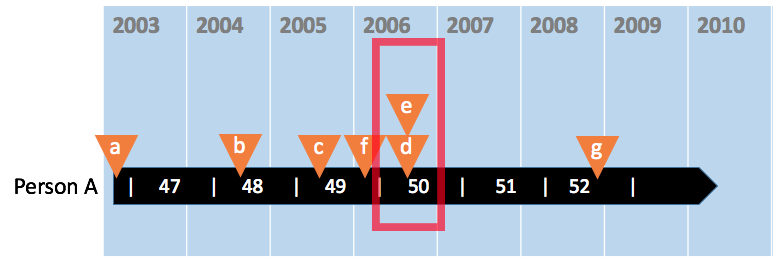

In [6]:
Image(filename='png/oct3_rand.png',width=800)

As I wrote before, across all people *i* in county *c* we sum:
$$ E_{c,d} = \sum_{i}  \hat{p}_{d,b }$$ 
$$ O_{c,d} = \sum_{i} I(d \in Rx_{i_{b} }) $$

And we can get the ratio $ O_{c,d}/E_{c,d} $ .  This ratio is what is plotted in the heatmap in Sep 20, where each column is one *d* and each row is one *c*.  That was just NY and CA.  To get more global view of the drugs and counties, I ran a simple PCA of the matrix (only using counties and drugs with (arbitrary cutoff) amount of data -> 57 drugs, 1232 counties).  Each point represents one county, and all counties from the same state have the same color.  The "legend" is in the map below the PCA plots:

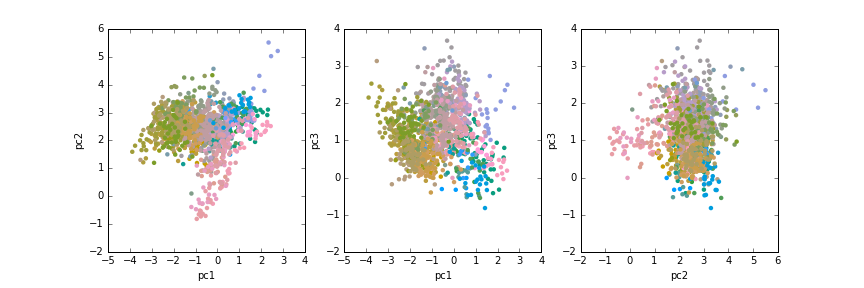

In [11]:
Image(filename='png/cty_pca.png',width=800)

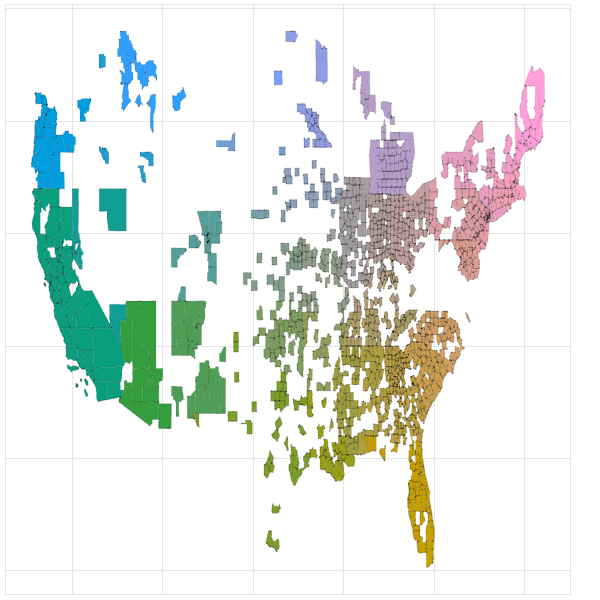

In [10]:
Image(filename='png/usalegend.png',width=600)

Some observations:  
- PC1 sort of resembles south vs north & PC2 mostly splits out the northeast and michigan
- Michigan has some extreme counties?

## County pattern research questions?
My top priority is still using this to predict drugs for the cancer-drug causality estimation, so this was really to see how much we could ignore county.  But there could be interesting research questions in the county view:
- How to quantify the global differences between counties? 
- Do classes of drugs also have a clustering pattern?
- Is there an autocorrelation between counties over years-- ie, some counties follow a lagged pattern as compared to other counties?  
    - Are some counties systematically late to stop prescribing discontinued drugs?
- How do the differences between counties break down by age or amount of medical care?
    - If I fix age or fix amount of care, is it the same pattern?
- Can we map these differences to other differences between the counties:
    - Ethnicities & Socioeconomics
    - Ages distribution (from our data)
    - Health outcomes
    - Health expenditure 
    - Weather

In [2]:
from IPython.display import Image